In [1]:
#Importing useful libraries 
import torch
from CustomReLUs import *
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import optim
from torch.utils.data import DataLoader

from utils import *

#This notebook is used to test the custom ReLU activation functions

In [2]:
# Import data & dataloaders
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor())
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor())

BATCHSIZE = 64

train_loader = DataLoader(train_data, batch_size=BATCHSIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCHSIZE, shuffle=True)


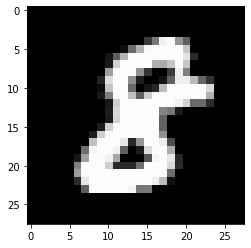

In [3]:
imag = next(iter(train_loader))[0]
plt.imshow(imag[0].squeeze(), cmap='gray')

In [4]:
# Define model to test the functions

class Net(nn.Module):
    def __init__(self, activation=ReLUAlpha(0), hidden_dim=128):
        super(Net, self).__init__()
        self.sequence = nn.Sequential(
            nn.Linear(784, hidden_dim),
            activation,
            nn.Linear(hidden_dim, hidden_dim),
            activation,
            nn.Linear(hidden_dim, 10)
        )

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.sequence(x)
        return x

In [12]:
epochs = 150
alpha = 1
loss_fn = nn.CrossEntropyLoss()
#activation = ReLUAlpha(alpha)
activation= nn.ReLU()
lr = 0.001

model = Net(activation).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss_relu,  test_loss_relu  = train_model(
    epochs, model, optimizer , 
    train_loader, test_loader, 
    loss_fn, device)



Epoch 1
-------------------------------
loss: 2.301636  [    0/60000]
loss: 0.444845  [ 6400/60000]
loss: 0.268743  [12800/60000]
loss: 0.247636  [19200/60000]
loss: 0.193241  [25600/60000]
loss: 0.292699  [32000/60000]
loss: 0.280589  [38400/60000]
loss: 0.263084  [44800/60000]
loss: 0.167513  [51200/60000]
loss: 0.157488  [57600/60000]
Test Error: 
 Accuracy: 95.4%, Avg loss: 0.151192 

Epoch 2
-------------------------------
loss: 0.243294  [    0/60000]
loss: 0.118306  [ 6400/60000]
loss: 0.163846  [12800/60000]
loss: 0.093519  [19200/60000]
loss: 0.146472  [25600/60000]
loss: 0.089654  [32000/60000]
loss: 0.240158  [38400/60000]
loss: 0.337956  [44800/60000]
loss: 0.153531  [51200/60000]
loss: 0.228726  [57600/60000]
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.099772 

Epoch 3
-------------------------------
loss: 0.082996  [    0/60000]
loss: 0.063635  [ 6400/60000]
loss: 0.054970  [12800/60000]
loss: 0.065688  [19200/60000]
loss: 0.075002  [25600/60000]
loss: 0.118943  [32000/600

In [13]:
alpha = 5
activation= ReLUAlpha(alpha)
lr = 0.001

model = Net(activation).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_loss_relua1,  test_loss_relua1  = train_model(
    epochs, model, optimizer , 
    train_loader, test_loader, 
    loss_fn, device)

Epoch 1
-------------------------------
loss: 2.304353  [    0/60000]
loss: 0.334653  [ 6400/60000]
loss: 0.262968  [12800/60000]
loss: 0.208526  [19200/60000]
loss: 0.213837  [25600/60000]
loss: 0.164278  [32000/60000]
loss: 0.151894  [38400/60000]
loss: 0.177958  [44800/60000]
loss: 0.197218  [51200/60000]
loss: 0.078882  [57600/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.134312 

Epoch 2
-------------------------------
loss: 0.137019  [    0/60000]
loss: 0.160953  [ 6400/60000]
loss: 0.159466  [12800/60000]
loss: 0.177496  [19200/60000]
loss: 0.179086  [25600/60000]
loss: 0.113959  [32000/60000]
loss: 0.151563  [38400/60000]
loss: 0.146050  [44800/60000]
loss: 0.178216  [51200/60000]
loss: 0.110077  [57600/60000]
Test Error: 
 Accuracy: 96.6%, Avg loss: 0.112383 

Epoch 3
-------------------------------
loss: 0.123045  [    0/60000]
loss: 0.023475  [ 6400/60000]
loss: 0.154846  [12800/60000]
loss: 0.027255  [19200/60000]
loss: 0.133091  [25600/60000]
loss: 0.116096  [32000/600

In [14]:
train_loss_relu = loss_to_numpy(train_loss_relu)
test_loss_relu = np.array(test_loss_relu)

train_loss_relua1 = loss_to_numpy(train_loss_relua1)
test_loss_relua1 = np.array(test_loss_relua1)

Text(0.5, 0.98, 'Loss vs Epochs for different ReLU functions')

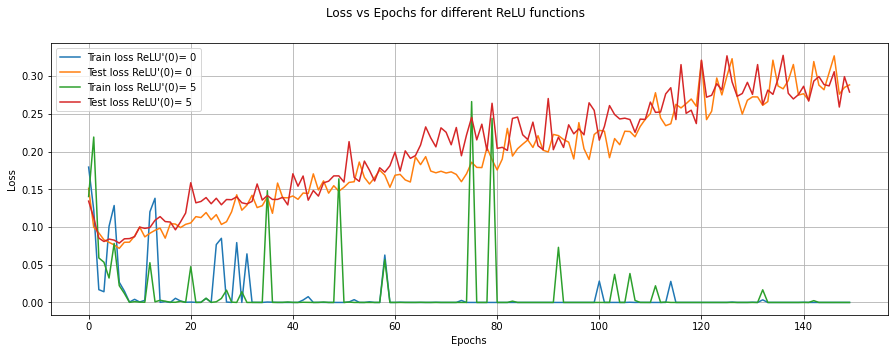

In [18]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_loss_relu, label="Train loss ReLU'(0)= 0")
plt.plot(test_loss_relu, label="Test loss ReLU'(0)= 0")
plt.plot(train_loss_relua1, label="Train loss ReLU'(0)= 5")
plt.plot(test_loss_relua1, label="Test loss ReLU'(0)= 5")
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.suptitle('Loss vs Epochs for different ReLU functions')